In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split , GridSearchCV
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)
df=pd.read_csv("../data/Fertilizer_Prediction.csv")
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [3]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [4]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [5]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [6]:
df.drop(['Temparature'],axis=1,inplace=True)
df.drop(['Humidity '],axis=1,inplace=True)
df.drop(['Moisture'],axis=1,inplace=True)

In [7]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

In [8]:
#encoding Soil Type variable
from sklearn.preprocessing import LabelEncoder
data=df.copy()
encode_soil = LabelEncoder()

#fitting the label encoder
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

In [9]:

data=df.copy()
encode_crop = LabelEncoder()

#fitting the label encoder
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

In [10]:
features = df[['Soil Type','Crop Type','Nitrogen','Potassium','Phosphorous']]
target = df['Fertilizer Name']

In [11]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(target)
label_encoded_y = label_encoder.transform(target)

In [12]:
df

,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,4,3,37,0,0,Urea
1,2,8,12,0,36,DAP
2,0,1,7,9,30,14-35-14
3,3,9,22,0,20,28-28
4,1,6,35,0,0,Urea
...,...,...,...,...,...,...
94,1,7,24,0,19,28-28
95,3,9,4,17,17,10-26-26
96,2,10,39,0,0,Urea
97,4,4,15,0,41,DAP


In [13]:
import scipy.stats as stat
df['Nitrogen'],parameter=stat.boxcox(df['Nitrogen']+1)
df['Phosphorous'],parameter=stat.boxcox(df['Phosphorous']+1)
df['Potassium']=df.Potassium**(1/1.2)

In [14]:
fertnew=df

In [15]:
fertnew

,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,4,3,2.568117,0.000000,0.000000,Urea
1,2,8,1.997168,0.000000,13.033743,DAP
2,0,1,1.694709,6.240251,11.543044,14-35-14
3,3,9,2.316360,0.000000,8.773216,28-28
4,1,6,2.542229,0.000000,0.000000,Urea
...,...,...,...,...,...,...
94,1,7,2.359974,0.000000,8.469993,28-28
95,3,9,1.371949,10.601666,7.844940,10-26-26
96,2,10,2.592415,0.000000,0.000000,Urea
97,4,4,2.117653,0.000000,14.204130,DAP


In [16]:
x=fertnew[['Soil Type'	,'Crop Type',	'Nitrogen',	'Potassium',	'Phosphorous']]
y=fertnew['Fertilizer Name']

In [17]:
feature_scale=[feature for feature in fertnew.columns if feature not in ['Fertilizer Name']]

In [18]:
from sklearn.preprocessing import StandardScaler
min_max=StandardScaler()
min_max=min_max.fit_transform(x)
df_minmax=pd.DataFrame(min_max,columns=x.columns)
df_minmax.head()

,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,1.417890,-0.688510,1.384655,-0.597074,-1.579903
1,-0.007197,0.911548,-0.429098,-0.597074,1.157704
2,-1.432285,-1.328533,-1.389928,1.080616,0.844598
3,0.705346,1.231559,0.584890,-0.597074,0.262823
4,-0.719741,0.271525,1.302415,-0.597074,-1.579903


In [19]:
data = pd.concat([df[['Fertilizer Name']].reset_index(drop=True),pd.DataFrame(df_minmax, columns=feature_scale)],axis=1)

In [20]:
data

,Fertilizer Name,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,Urea,1.417890,-0.688510,1.384655,-0.597074,-1.579903
1,DAP,-0.007197,0.911548,-0.429098,-0.597074,1.157704
2,14-35-14,-1.432285,-1.328533,-1.389928,1.080616,0.844598
3,28-28,0.705346,1.231559,0.584890,-0.597074,0.262823
4,Urea,-0.719741,0.271525,1.302415,-0.597074,-1.579903
...,...,...,...,...,...,...
94,28-28,-0.719741,0.591536,0.723441,-0.597074,0.199134
95,10-26-26,0.705346,1.231559,-2.415252,2.253181,0.067848
96,Urea,-0.007197,1.551571,1.461841,-0.597074,-1.579903
97,DAP,1.417890,-0.368498,-0.046349,-0.597074,1.403532


In [21]:
x1=data.drop(['Fertilizer Name'],axis=1)
y1=data['Fertilizer Name']

In [22]:
acc=[]
modelname=[]

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x1,y1,test_size = 0.25,random_state =10)

In [24]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
lg=LogisticRegression(multi_class='multinomial', solver='lbfgs',random_state=0)
lg.fit(Xtrain,Ytrain)

predicted_values1=lg.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values1))
print(accuracy_score(Ytest,predicted_values1))
print(classification_report(Ytest,predicted_values1))

x=accuracy_score(Ytest,predicted_values1)
acc.append(x)
modelname.append('Logistic Regression')


[[2 1 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 8 0]
 [0 0 0 0 0 0 2]]
0.96
              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       0.80      1.00      0.89         4
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         2
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         8
        Urea       1.00      1.00      1.00         2

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.97      0.96      0.96        25



In [25]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/FNLogisiticRegression.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(lg, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [26]:
dt=DecisionTreeClassifier()
dt.fit(Xtrain,Ytrain)

predicted_values2=dt.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values2))
print(accuracy_score(Ytest,predicted_values2))
print(classification_report(Ytest,predicted_values2))

x=accuracy_score(Ytest,predicted_values2)
acc.append(x)
modelname.append('Decision Tree')

[[2 1 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 8 0]
 [0 0 0 0 0 0 2]]
0.96
              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       0.80      1.00      0.89         4
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         2
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         8
        Urea       1.00      1.00      1.00         2

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.97      0.96      0.96        25



In [27]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/FNDecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(dt, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(Xtrain,Ytrain)

predicted_values3 = rf.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values3))
print(accuracy_score(Ytest,predicted_values3))
print(classification_report(Ytest,predicted_values3))

x=accuracy_score(Ytest,predicted_values3)
acc.append(x)
modelname.append('RandomForestClassifier')

[[3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 8 0]
 [0 0 0 0 0 0 2]]
1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         2
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         8
        Urea       1.00      1.00      1.00         2

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [29]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/FNRandomForestClassifier.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(rf, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain,Ytrain)


predicted_values4 = nb.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values4))
print(accuracy_score(Ytest,predicted_values4))
print(classification_report(Ytest,predicted_values4))

x=accuracy_score(Ytest,predicted_values4)
acc.append(x)
modelname.append('Guassian Naive Bayes')

[[3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 8 0]
 [0 0 0 0 0 0 2]]
1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         2
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         8
        Urea       1.00      1.00      1.00         2

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [31]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/FNGuassian Naive Bais.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(nb, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [32]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,label_encoded_y,test_size = 0.2,random_state =2)

In [36]:
from xgboost import XGBClassifier  
import xgboost

In [37]:
xgb = XGBClassifier()
xgb.fit(Xtrain, Ytrain)

predicted_values6 = xgb.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values6))
print(accuracy_score(Ytest,predicted_values6))
print(classification_report(Ytest,predicted_values6))


x=accuracy_score(Ytest,predicted_values6)
acc.append(x)
modelname.append('XGboost')

[[3 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 5]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [38]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
filename = '../models/FNXGBoost.pkl'
# Open the file to save as pkl file

pickle.dump(xgb, open(filename, "wb"))
xgb_model_loaded = pickle.load(open(filename, "rb"))
# Close the pickle instances
DT_Model_pkl.close()


In [39]:
from sklearn.svm import SVC
svc1 = SVC(C= 500, gamma= 0.1, kernel= 'poly')
svc1.fit(Xtrain,Ytrain)

pred5=svc1.predict(Xtest)
print(confusion_matrix(Ytest,pred5))
print(accuracy_score(Ytest,pred5))
print(classification_report(Ytest,pred5))

x=accuracy_score(Ytest,pred5)
acc.append(x)
modelname.append('support Vector Machine')

[[3 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 5]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [40]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/FNSupport Vector.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(svc1, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

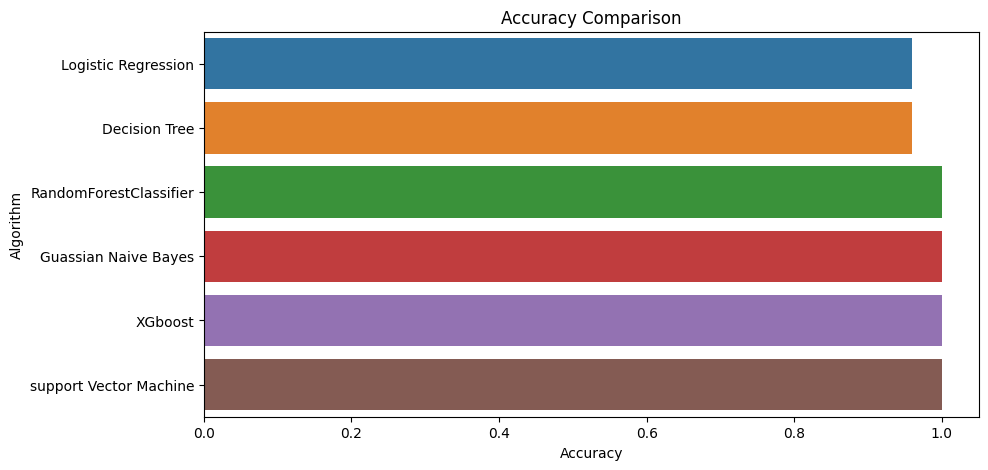

In [41]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = modelname)

In [42]:
accuracy_models = dict(zip(modelname, acc))
for k, v in accuracy_models.items():
    print (k, ':', v)

Logistic Regression : 0.96
Decision Tree : 0.96
RandomForestClassifier : 1.0
Guassian Naive Bayes : 1.0
XGboost : 1.0
support Vector Machine : 1.0
